<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 3

Crie um sistema especialista capaz de imitar a tomada de decisões de um especialista humano. A base de conhecimento a ser utilizada é a base do trabalho 1. Vc deve criar regras que separam as 2 classes de interesse e programa-las como um mecanismo de inferência. Para isso siga os seguintes passos:

1. Separe a base de dados em treinamento e teste. Essa separação deve resultar em 2 conjuntos de dados distintos: X_train e X_test, assim como 2 conjuntos de rótulos distintos: y_train e y_test. A base de treino deve ter 66% dos dados e a base de teste deve ter 33% dos dados.

1. Crie um scatterplot da base de treinamento

1. Visualize e interprete os dados, de forma a criar alguma regra de inferencia que separe as duas classes

1. Implemente a regra na forma de if/else, criando assim um mecanismo de inferência

1. Aplique as regras a cada amostra da base de dados de treino e verifique se classificou corretamente ou não. Calcule a média de acertos.

1. Com base na regra criada, determine a reta de decisão obtida e plote a mesma sobre o scatterplot

1. Crie um scatterplot 2, para a base de teste, plote a reta de decisão

1. Aplique as regras a cada amostra da base de dados de teste e verifique se classificou corretamente ou não. Calcule a média de acertos.

## Criado o DataFrame

In [ ]:
lista_maca_peso = [168, 201, 184, 216, 177, 230, 149, 192, 206, 219, 177, 194, 241, 162, 207]
lista_maca_diam = [7.7, 9.2, 8.5, 9.8, 8.1, 10.1, 6.9, 8.8, 9.4, 10.0, 8.2, 9.0, 10.6, 7.5, 9.6]
maca = ['maca' for i in range(15)]

lista_laranja_peso = [150, 162, 170, 182, 195, 204, 213, 221, 234, 246, 257, 266, 278, 287, 296]
lista_laranja_diam = [6, 6.5, 6.8, 7.1, 7.4, 7.7, 8, 8.3, 8.6, 8.9, 9.2, 9.5, 9.8, 10.1, 10.4]
laranja = ['laranja' for i in range(15)]

In [ ]:
peso = lista_maca_peso + lista_laranja_peso
diam = lista_maca_diam + lista_laranja_diam
frutas = maca + laranja

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=['peso', 'diametro', 'fruta'])
df['peso'] = peso
df['diametro'] = diam
df['fruta'] = frutas
df

,peso,diametro,fruta
0,168,7.7,maca
1,201,9.2,maca
2,184,8.5,maca
3,216,9.8,maca
4,177,8.1,maca
5,230,10.1,maca
6,149,6.9,maca
7,192,8.8,maca
8,206,9.4,maca
9,219,10.0,maca


## Separando os modelos

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 1
np.random.seed(SEED)

df['fruta'] = df.apply(lambda x : 0 if x['fruta'] == 'maca' else 1, axis=1)

X = df[['peso', 'diametro']]
y = df['fruta']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

## Scatter Plot da base de treinamento

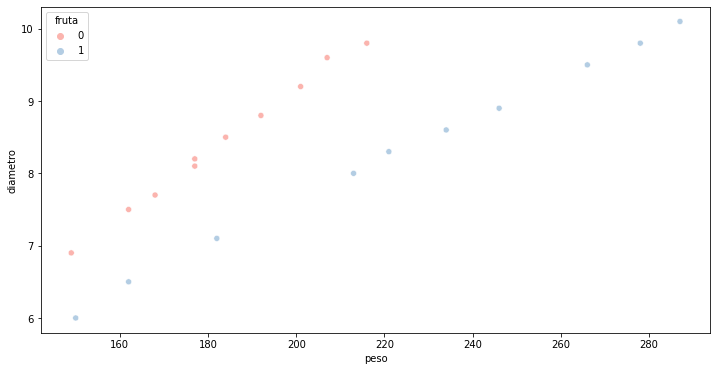

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=X_train, x='peso', y='diametro', hue=y_train, palette='Pastel1')
plt.show()

## Criando a classe com os métodos necessários para o modelo

In [ ]:
class Specialist:
    def __init__(self, coef=24):
        # self.__trained = False
        self.__coef = coef

    # def train(self, X_train, y_train):
    #     df_train = pd.DataFrame()
    #     df_train[['peso', 'diam']] = X_train
    #     df_train['fruta'] = y_train
    #     df_train['prop'] = df_train['peso'] / df_train['diam']
    #     medias = df_train.groupby('fruta')['prop'].mean()
    #     self.__coef = medias.mean()
    #     self.__trained = True

    def predict(self, X):
        # if not(self.__trained) : raise Exception('O modelo não foi treinado ainda')
        # return X.apply(lambda x : 0 if x['peso'] / x['diametro'] < self.__coef else 1, axis = 1)
        return np.where( X['peso'] / X['diametro'] > self.__coef, 1, 0)

    def score(self, y_predict, y):
        return np.sum(y == y_predict) / len(y)

    def get_coef(self):
        return self.__coef

## Instanciando o objeto, prevendo e testando os resultados

In [ ]:
sp = Specialist()

# sp.train(X_train, y_train)

pred = sp.predict(X_train)
score_train = sp.score(pred, y_train)

pred_test = sp.predict(X_test)
score_test = sp.score(pred_test, y_test)

print(f'O score no treinamento foi: {score_train * 100} %\n' +
      f'O score no teste foi: {score_test * 100} %')

O score no treinamento foi: 100.0 %
O score no teste foi: 100.0 %


## Plot do teste com a reta

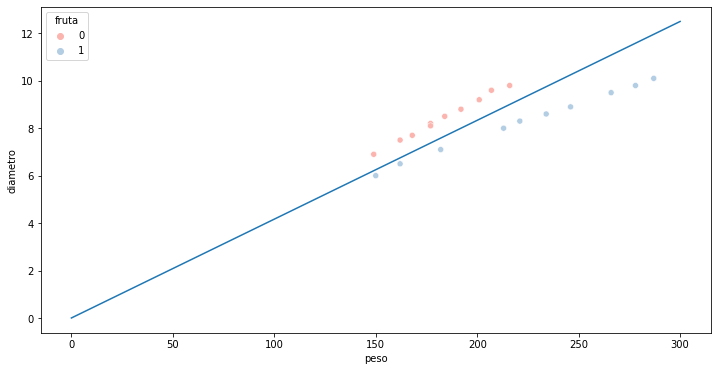

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=X_train, x='peso', y='diametro', hue=y_train, palette='Pastel1')
plt.plot([0, 300], [0, 300 / sp.get_coef()])
plt.show()

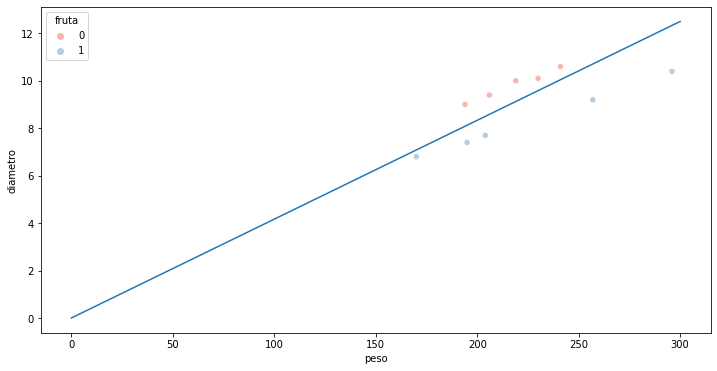

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=X_test, x='peso', y='diametro', hue=y_test, palette='Pastel1')
plt.plot([0, 300], [0, 300 / sp.get_coef()])
plt.show()